In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Get current directory 
data_path = os.path.curdir

# Read yelp business data
business_df = pd.read_csv(os.path.join(data_path, 'clean_business.csv'))

# Read Arizona state geometric data
county_data = gpd.read_file(os.path.join(data_path, 'tl_2018_us_county', 'tl_2018_us_county.shp'))
city_data = gpd.read_file(os.path.join(data_path, 'tl_2018_04_place', 'tl_2018_04_place.shp'))

In [3]:
print(business_df.shape)
business_df.head(2)

(7122, 14)


,attributes,business_id,categories,city,is_open_2017,latitude,longitude,name,postal_code,review_count,stars,state,is_open_2018,isBankrupt
0,"{'RestaurantsTableService': False, 'GoodForMea...",rDMptJYWtnMhpQu_rRXHng,"['Fast Food', 'Burgers', 'Restaurants']",Phoenix,1,33.60707,-112.064382,McDonald's,85022.0,10,1.0,AZ,1,0
1,"{'RestaurantsTableService': True, 'GoodForMeal...",1WBkAuQg81kokZIPMpn9Zg,"['Burgers', 'Restaurants']",Phoenix,1,33.60731,-112.063404,Charr An American Burger Bar,85022.0,232,3.0,AZ,1,0


In [4]:
print(county_data.shape)
county_data.head(2)

(3233, 18)


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.019516 42.004097, -97.019519 42...."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.436394 46.238197, -123.447592 4..."


In [5]:
print(city_data.shape)
city_data.head(2)

(450, 17)


,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,30270,02412713,0430270,Guadalupe,Guadalupe town,43,C1,N,N,G4110,A,2081955,0,+33.3664506,-111.9631777,"POLYGON ((-111.970085 33.359934, -111.970081 3..."
1,04,41330,02410842,0441330,Litchfield Park,Litchfield Park city,25,C1,N,N,G4110,A,8517915,79033,+33.5017614,-112.3594696,"(POLYGON ((-112.336288 33.493399, -112.332267 ..."


# Plot City

In [6]:
cities = business_df['city'].unique()
cities

array(['Phoenix', 'Scottsdale', 'Mesa', 'Laveen', 'Chandler', 'Glendale',
       'Avondale', 'Sun City', 'Peoria', 'Litchfield Park', 'El Mirage',
       'Gilbert', 'Tempe', 'Goodyear', 'Surprise', 'Cave Creek', 'MESA',
       'Paradise Valley', 'Sun City West', 'Fountain Hills', 'Ahwatukee',
       'Tolleson', 'Carefree', 'Central City', 'Scottdale', 'Sun Lakes',
       'Youngtown', 'Higley', 'Central City Village', 'Guadalupe',
       'Mesa AZ', 'Fort McDowell', 'Anthem', 'Waddell', 'Laveen Village',
       'Phoenix Valley', 'Glendale Az', 'Schottsdale', 'Phx'],
      dtype=object)

In [7]:
len(business_df['city'].unique())

39

In [8]:
city_data = city_data[city_data['NAME'].apply(lambda row: row in cities)].reset_index(drop=True)
city_data.shape

(24, 17)

## Method 1

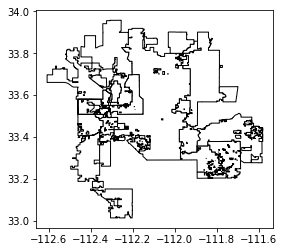

In [9]:
city_data['geometry'].plot(color='white', edgecolor='black');

## Method 2 

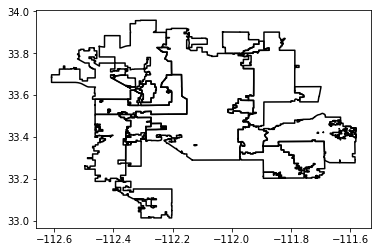

In [10]:
for shape in city_data['geometry']:
    if shape.geom_type == 'Polygon':
        plt.plot(*shape.exterior.xy, color='black')
    elif shape.geom_type == 'MultiPolygon':
        for polygon in shape:
            plt.plot(*polygon.exterior.xy, color='black')
    else:
        ;

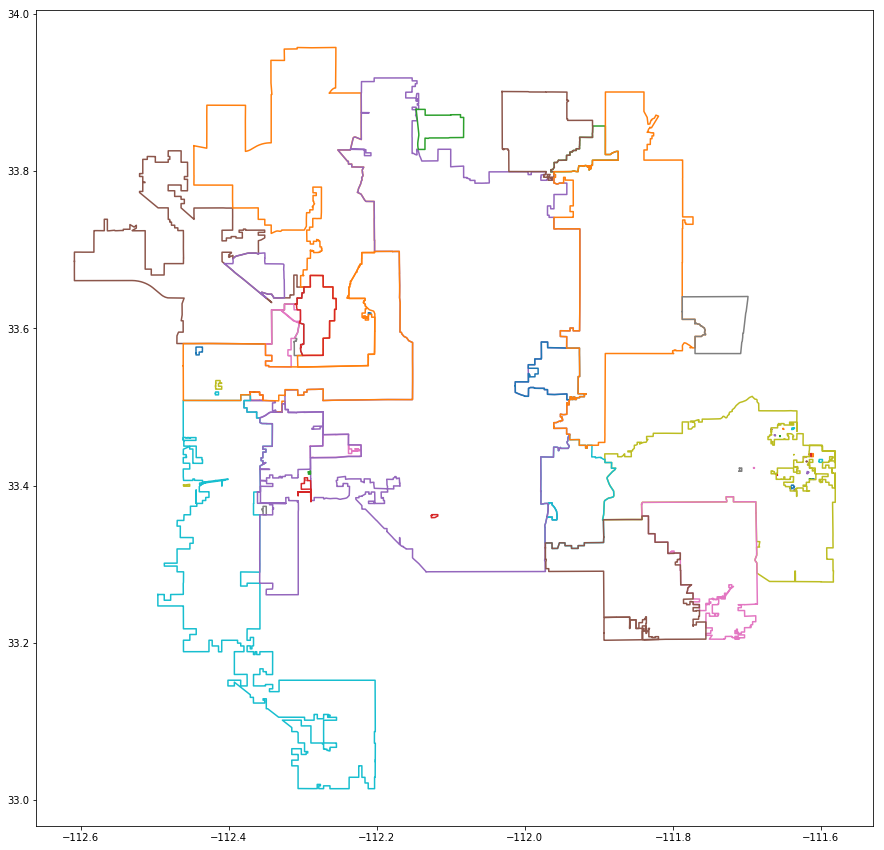

In [11]:
plt.figure(figsize = (15,15))
for shape in city_data['geometry']:
    if shape.geom_type == 'Polygon':
        plt.plot(*shape.exterior.xy)
    elif shape.geom_type == 'MultiPolygon':
        for polygon in shape:
            plt.plot(*polygon.exterior.xy)
    else:
        ;

# Plot Counties

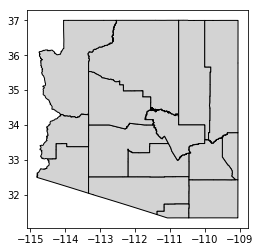

In [12]:
county_data[county_data['STATEFP'] == '04']['geometry'].plot(color='lightgrey', edgecolor='black');